Pair Programming Métricas Regresión Lineal - 10

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:
 - Calculéis las métricas para vuestro modelo
 - Discutid los resultados de las métricas y extraed conclusiones
 - Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [18]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [19]:
df = pd.read_csv('/mnt/d/Adalab/ejercicios-de-adalab/modulo-3/DA-promoC-Mod3-sprint1-MarinayMarta/files/wellness_8.csv', index_col = 0)

In [36]:
df.sample(6)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_RAIZ,AGE_le,owners_Female,owners_Male
11582,5,3,8,7,2,7,9,1,8,7,2,Female,674.9,25.978838,1,1,0
4021,1,5,4,4,2,2,6,2,1,2,2,Male,586.6,24.219827,1,0,1
8230,1,0,3,10,2,3,7,1,2,7,1,Female,607.4,24.645486,0,1,0
6042,3,5,3,4,2,8,8,2,2,4,2,Female,625.6,25.011997,1,1,0
2466,1,5,3,3,1,8,7,1,1,10,0,Female,611.8,24.734591,3,1,0
7609,4,4,7,10,1,7,8,2,6,7,0,Female,708.7,26.621420,3,1,0


In [37]:
df1 = df.copy()

In [35]:
# cambiamos el tipo de datos a 3 columnas:
# for col in['DAILY_STRESS', 'BMI_RANGE', 'SUFFICIENT_INCOME']:
#     df1[col] = df[col].astype('category')

In [40]:
df1.sample(3)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_RAIZ,AGE_le,owners_Female,owners_Male
5325,1,4,7,10,2,8,7,2,6,4,2,Male,707.0,26.589472,1,0,1
11721,3,1,10,6,1,10,6,1,5,10,3,Female,712.3,26.688949,2,1,0
2200,4,3,5,3,1,5,6,1,1,0,1,Male,643.3,25.363359,0,0,1


In [45]:
df1.drop(['GENDER'], axis = 1, inplace = True)

# Creamos el modelo

In [46]:
X = df1.drop('WORK_LIFE_BALANCE_SCORE_RAIZ', axis = 1)
y = df['WORK_LIFE_BALANCE_SCORE_RAIZ']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [49]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. Fijaros que para que aprenda, les paso solo los datos de entrenamiento

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [52]:
# es el momento de hacer las predicciones => método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para los scores en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para los scores que tenemos en los datos de test

In [51]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
3271,25.930677,25.918079,Train
5715,25.752670,25.742190,Train
4074,27.325812,27.349858,Train
4447,26.166773,26.146121,Train
4298,25.579288,25.559192,Train


In [53]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
3271,25.930677,25.918079,Train,0.012598
5715,25.752670,25.742190,Train,0.010480
4074,27.325812,27.349858,Train,-0.024046
4447,26.166773,26.146121,Train,0.020652
4298,25.579288,25.559192,Train,0.020097


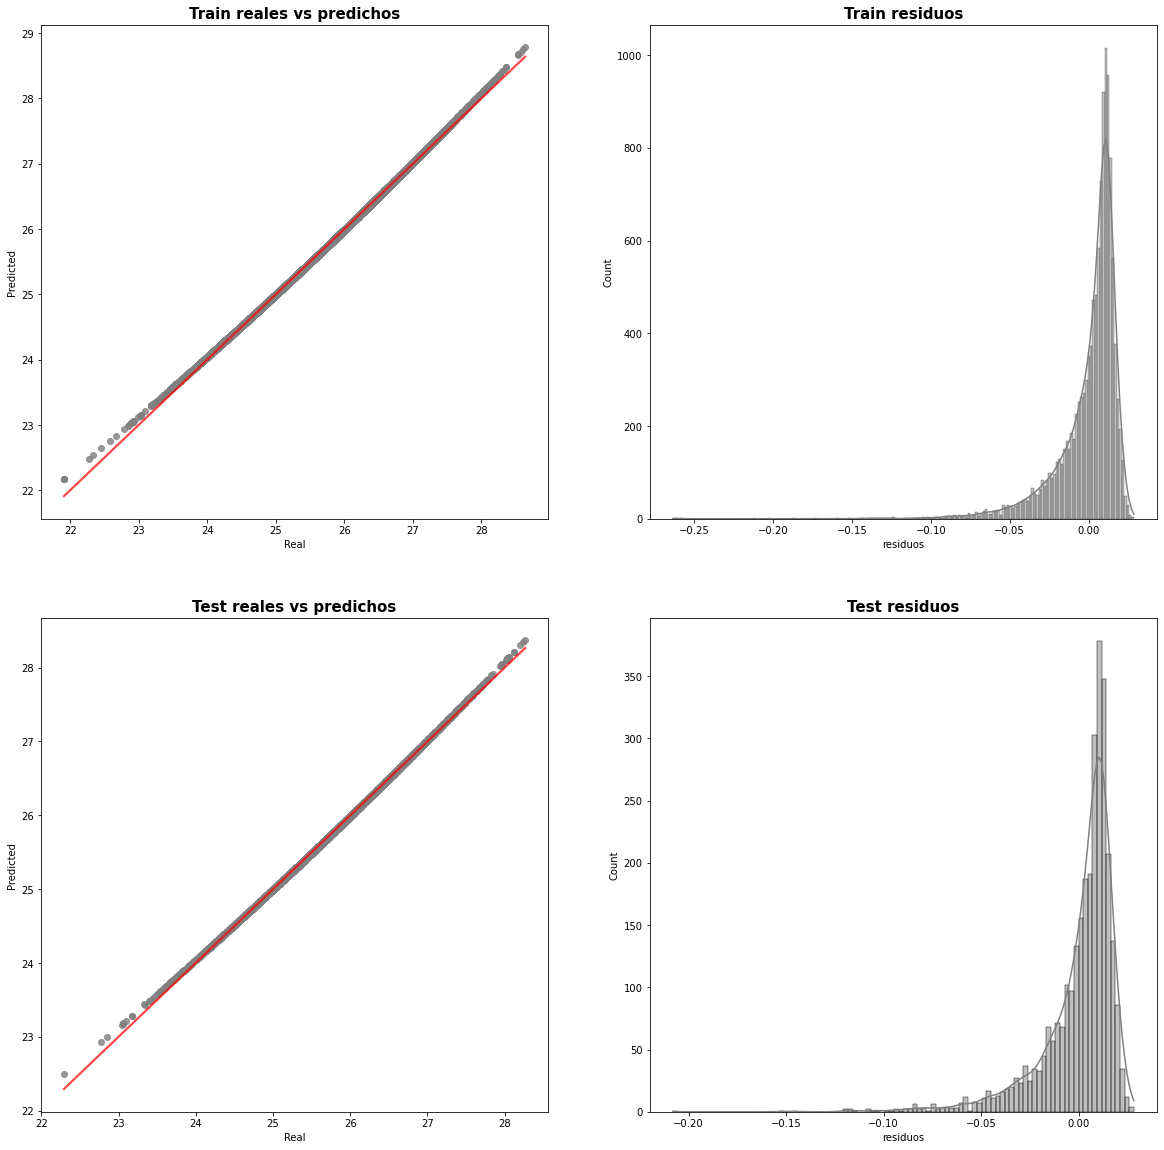

In [54]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


=> Los valores residuales están muy cerca de 0 => overfitting

# Calculamos las métricas

In [55]:
# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9994570875626111
El MAE es 0.0139790483706509
El MSE es 0.00041733750926532386
EL RMSE es  0.02042884013509636
Para el conjunto test:---------------
El valor de r2 score es  0.9994789143432231
El MAE es 0.01373714395811567
El MSE es 0.0003948336225129488
EL RMSE es  0.01987042079355515


In [56]:
# los resultados en un dataframe
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.013737,0.000395,0.019870,0.999479,test,Linear Regresion
1,0.013979,0.000417,0.020429,0.999457,train,LinearRegression


- => R2 : train : el modelo explica 99% de la variación en el score (var. respuesta)
- => MAE/MSE : train : muy cerca de 0 : modelo con pocos errores de prediccion
- => RMSE : train : = 0.02 => en media nuestro modelo se equivoca en 0.02 decimales

- => concluimos que nuestro modelo podrá no ser capaz de hacer buenas predicciones con nuevos datos.


In [59]:
df_resultados.to_csv('wellness_resultados_10')